In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataset=pd.read_csv("Documents\cruise_ship_info.csv")
dataset.head()


,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [9]:
#calculate basic statistics of the data
dataset.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [10]:
cols=["Age","Tonnage","passengers","length","cabins","passenger_density","crew"]

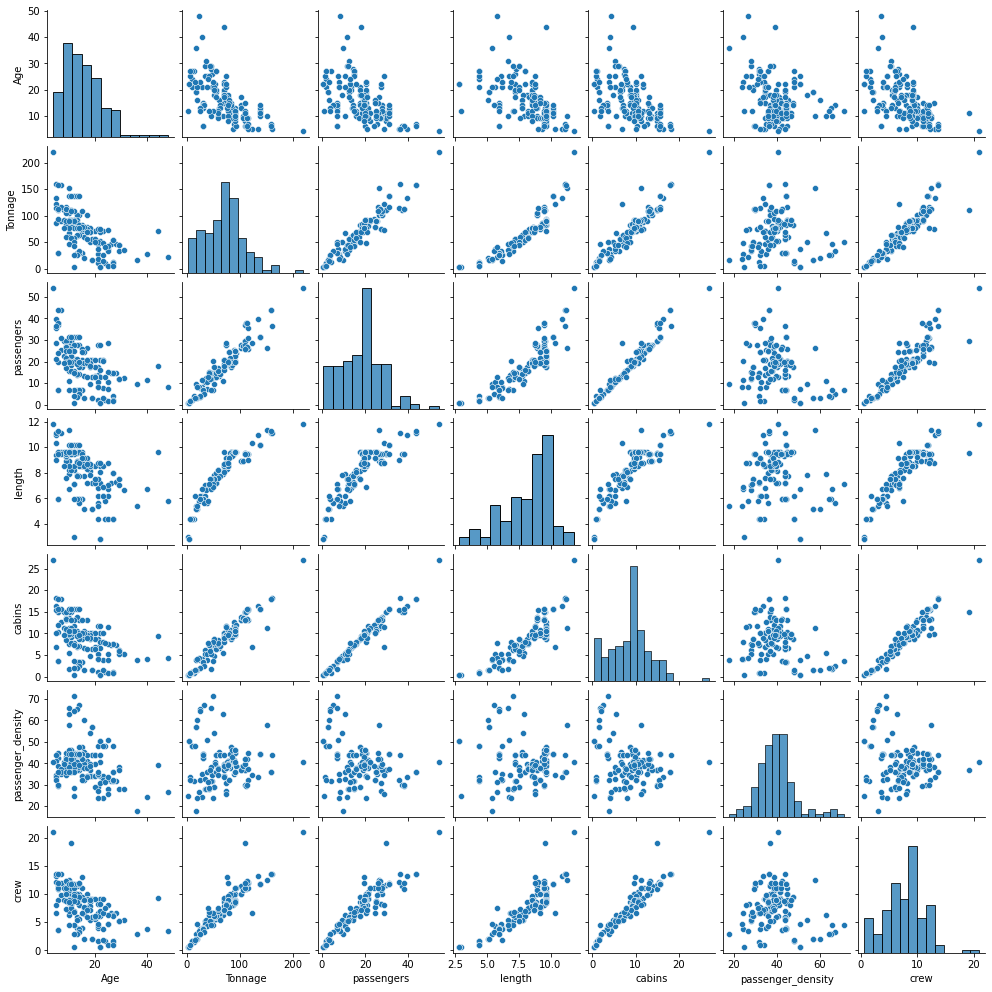

In [12]:
sns.pairplot(dataset[cols], height=2.0)

C:\Users\mercy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


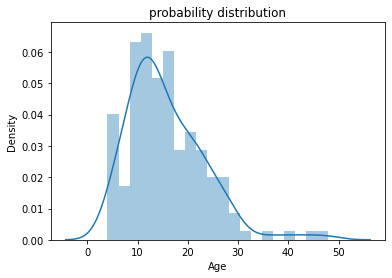

In [18]:
sns.distplot(dataset['Age'], bins=20)
plt.title('probability distribution')
plt.show()

C:\Users\mercy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


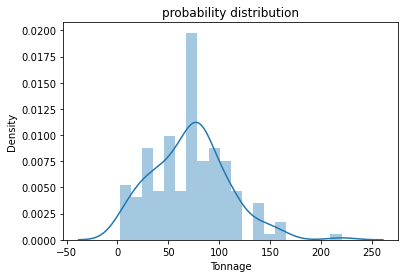

In [19]:
sns.distplot(dataset['Tonnage'],bins=20)
plt.title('probability distribution')
plt.show()

In [20]:
#variable selection for predicting crew size

#A calculation for covariancematrix
cols=["Age","Tonnage","passengers","length","cabins","passenger_density","crew"]
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
x_std=stdsc.fit_transform(dataset[cols].iloc[:,range(0,7)].values)


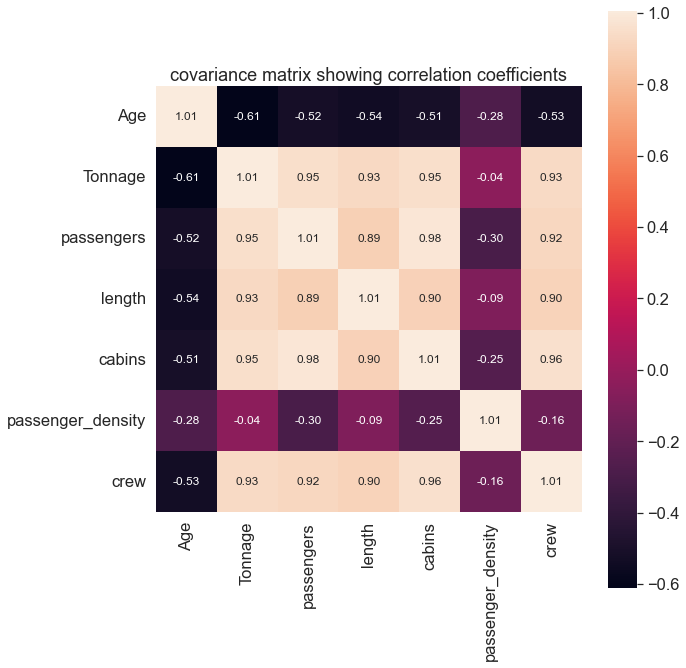

In [21]:
cov_mat=np.cov(x_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm=sns.heatmap(cov_mat,
              cbar=True,
              annot=True,
              square=True,
              fmt='.2f',
              annot_kws={'size':12},
              yticklabels=cols,
              xticklabels=cols)
plt.title('covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()


In [22]:
#selecting important variables
cols_selected=['Tonnage','passengers','length','cabins','crew']

dataset[cols_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [24]:
x=dataset[cols_selected].iloc[:,0:4].values
y=dataset[cols_selected]['crew'].values

In [25]:
 x.shape
    

(158, 4)

In [26]:
y.shape

(158,)

In [28]:
#one-hot ncoding for categorical features
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0 ,1])
pd.get_dummies(dataset[['ship_name','cruise_line','Age','Tonnage','passenger_density','length','cabins','crew']])

TypeError: __init__() got an unexpected keyword argument 'categorical_features'